In [6]:
import pandas as pd 

In [7]:
df= pd.read_csv("monster_com-job_sample.csv")

In [8]:
df.head(100)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,United States of America,US,NaN,No,jobs.monster.com,The Judge Group is looking for a Scrum Master ...,Scrum Master Job in Denver,"Full Time, Employee","Denver, CO",Computer/IT Services,http://jobview.monster.com/Scrum-Master-Job-De...,NaN,IT/Software Development,5091d726fbce4a824fe6a1d49458ad4a
96,United States of America,US,NaN,No,jobs.monster.com,Financial Advisor Northwestern MutualOur finan...,Financial Advisor / Financial Sales Representa...,Full Time Employee,"Houston, TX",Banking,http://jobview.monster.com/Financial-Advisor-F...,NaN,Sales/Retail/Business Development,e52d5e30ecdf97dd64a44f45bfc2032b
97,United States of America,US,NaN,No,jobs.monster.com,Job Title: Personal Banker (SAFE) 1 - Bear Val...,Personal Banker (SAFE) Bear Valley Job in Denver,Full Time Employee,"Denver, CO",Banking,http://jobview.monster.com/Personal-Banker-SAF...,NaN,Experienced (Non-Manager),c639b20ed01b45b3f3aff1ef58a5d9ce
98,United States of America,US,NaN,No,jobs.monster.com,"*****THIS POSITION IS IN Decatur, IL. PLEASE A...",Mechanical Engineer Relocate to Decatur,Full Time Employee,"Bloomington, IL",NaN,http://jobview.monster.com/Mechanical-Engineer...,NaN,General/Other: Engineering,1670bab124bbe35985e761939c4cbb6b


In [10]:
df['job_title'].value_counts().head(10)

job_title
Monster                                         318
Shift Supervisor Job in Camphill                256
RN                                               70
Shift Supervisor - Part-Time Job in Camphill     56
Manager                                          50
Please apply only if you are qualified.          31
ASST STORE MGR Job in Columbus                   26
LEAD SALES ASSOCIATE-FT Job in Columbus          26
SALES ASSOCIATE Job in Columbus                  24
LEAD SALES ASSOCIATE-PT Job in Columbus          24
Name: count, dtype: int64

In [11]:
target_role = "RN"
job_description = df[df['job_title'] == target_role]['job_description'].iloc[0]
job_description

'Job Description Registered professional nurse who assesses, implements or delegates, plans, and evaluates total nursing care and functions in accordance with established philosophy, providing and directing patient care for a group of patients.\xa0 Relates effectively with other shifts/departments for optimal continuity of care.\xa0 Provides clinical supervision for entry level nurses and assists in their development.Job Responsibilities\xa0\xa0\xa0 Nursing Process\xa0\xa0\xa0 1. Uses critical thinking skills to assess the basic physical, psychological, social, cultural, spiritual, and developmental needs of patients and families.\xa0 Communicates findings to appropriate healthcare team members.\xa0\xa0\xa0 \xa0a.\xa0\xa0\xa0\xa0\xa0\xa0 Collects data from all applicable resources; organizes assessment data so that it is complete and accessible; and then documents findings (legibly) in the medical record or other appropriate documents.\xa0\xa0\xa0 \xa0b.\xa0\xa0\xa0\xa0\xa0 Recognizes 

Convert all text to lowercase

Remove non-text artifacts like \xa0 and line breaks

Remove punctuation characters

Normalize extra whitespace

Preserve stopwords initially

Preserve domain-specific terms like rn, bls, acls, hipaa

Apply identical preprocessing to resumes and job descriptions

In [12]:
import re

clean_job_description = job_description.lower()
clean_job_description = re.sub(r'\xa0', ' ', clean_job_description)
clean_job_description = re.sub(r'[^a-z\s]', ' ', clean_job_description)
clean_job_description = re.sub(r'\s+', ' ', clean_job_description).strip()

clean_job_description[:500]


'job description registered professional nurse who assesses implements or delegates plans and evaluates total nursing care and functions in accordance with established philosophy providing and directing patient care for a group of patients relates effectively with other shifts departments for optimal continuity of care provides clinical supervision for entry level nurses and assists in their development job responsibilities nursing process uses critical thinking skills to assess the basic physica'

In [13]:
import string

print("Uppercase exists:", any(char.isupper() for char in clean_job_description))
print("Punctuation exists:", any(char in string.punctuation for char in clean_job_description))
print("Non-breaking space exists:", '\xa0' in clean_job_description)
print("Multiple spaces exist:", "  " in clean_job_description)
print("Key domain term present (nurse):", "nurse" in clean_job_description)


Uppercase exists: False
Punctuation exists: False
Non-breaking space exists: False
Multiple spaces exist: False
Key domain term present (nurse): True


Skill Extraction Strategy

In this project, a skill is defined as a job-related ability, certification, or competency required for the RN role. A predefined list of RN-specific skills will be created manually based on common nursing requirements. Both the job description and resumes will be cleaned using the same preprocessing rules. After cleaning, the system will check whether the skill words from the predefined list appear in the text. If a skill word is found, it is considered present for that candidate. This approach is simple, transparent, and easy to explain to non-technical users. However, it may miss skills that are written using uncommon or indirect wording.

RN skills list:

rn license

bls

acls

hipaa

patient care

nursing process

medication administration

pain management

patient assessment

clinical documentation

infection control

patient education

sbar communication

care coordination

In [14]:
rn_skills = [
    "rn license",
    "bls",
    "acls",
    "hipaa",
    "patient care",
    "nursing process",
    "medication administration",
    "pain management",
    "patient assessment",
    "clinical documentation",
    "infection control",
    "patient education",
    "sbar communication",
    "care coordination"
]

rn_skills


['rn license',
 'bls',
 'acls',
 'hipaa',
 'patient care',
 'nursing process',
 'medication administration',
 'pain management',
 'patient assessment',
 'clinical documentation',
 'infection control',
 'patient education',
 'sbar communication',
 'care coordination']

In [15]:
matched_skills = []
missing_skills = []

for skill in rn_skills:
    if skill in clean_job_description:
        matched_skills.append(skill)
    else:
        missing_skills.append(skill)

print("Matched skills:", matched_skills)
print("Missing skills:", missing_skills)


Matched skills: ['bls', 'acls', 'hipaa', 'patient care', 'nursing process', 'patient assessment', 'infection control']
Missing skills: ['rn license', 'medication administration', 'pain management', 'clinical documentation', 'patient education', 'sbar communication', 'care coordination']


Resume Scoring Logic:
Each resume is cleaned using the same text preprocessing rules applied to the job description. After cleaning, the resume text is checked against the predefined RN skill list. For every RN skill that appears in the resume, one point is added to the candidate’s score. Skills that do not appear in the resume are ignored. The total score represents how well the resume matches the RN role. Candidates are ranked based on their total scores, where a higher score indicates a better role fit.

In [16]:
resumes = [
    "registered nurse with rn license bls acls experience in patient care pain management and medication administration",

    "rn with bls certification skilled in patient assessment clinical documentation and infection control",

    "senior registered nurse with rn license acls experience in patient care nursing process and patient education",

    "nursing graduate with basic patient care experience bls certified seeking rn role",

    "licensed rn experienced in medication administration pain management hipaa compliance and patient education",

    "healthcare assistant with patient care experience but no rn license",

    "registered nurse with rn license bls acls skilled in sbar communication and care coordination",

    "rn with experience in clinical documentation infection control and nursing process",

    "junior nurse with bls certification basic patient care and hospital internship experience",

    "non clinical professional with no healthcare or nursing background",

    "experienced rn with rn license acls bls patient assessment and leadership in care coordination",

    "rn with strong focus on patient safety hipaa compliance and infection control"
]

resumes


['registered nurse with rn license bls acls experience in patient care pain management and medication administration',
 'rn with bls certification skilled in patient assessment clinical documentation and infection control',
 'senior registered nurse with rn license acls experience in patient care nursing process and patient education',
 'nursing graduate with basic patient care experience bls certified seeking rn role',
 'licensed rn experienced in medication administration pain management hipaa compliance and patient education',
 'healthcare assistant with patient care experience but no rn license',
 'registered nurse with rn license bls acls skilled in sbar communication and care coordination',
 'rn with experience in clinical documentation infection control and nursing process',
 'junior nurse with bls certification basic patient care and hospital internship experience',
 'non clinical professional with no healthcare or nursing background',
 'experienced rn with rn license acls bls 

In [17]:
clean_resumes = []

for resume in resumes:
    text = resume.lower()
    text = text.replace('\xa0', ' ')
    text = ''.join([c if c.isalpha() or c.isspace() else ' ' for c in text])
    text = ' '.join(text.split())
    clean_resumes.append(text)

clean_resumes


['registered nurse with rn license bls acls experience in patient care pain management and medication administration',
 'rn with bls certification skilled in patient assessment clinical documentation and infection control',
 'senior registered nurse with rn license acls experience in patient care nursing process and patient education',
 'nursing graduate with basic patient care experience bls certified seeking rn role',
 'licensed rn experienced in medication administration pain management hipaa compliance and patient education',
 'healthcare assistant with patient care experience but no rn license',
 'registered nurse with rn license bls acls skilled in sbar communication and care coordination',
 'rn with experience in clinical documentation infection control and nursing process',
 'junior nurse with bls certification basic patient care and hospital internship experience',
 'non clinical professional with no healthcare or nursing background',
 'experienced rn with rn license acls bls 

In [18]:
resume_scores = []

for idx, resume in enumerate(clean_resumes):
    matched = []
    for skill in rn_skills:
        if skill in resume:
            matched.append(skill)
    score = len(matched)
    resume_scores.append({
        "candidate_id": idx + 1,
        "score": score,
        "matched_skills": matched
    })

resume_scores


[{'candidate_id': 1,
  'score': 6,
  'matched_skills': ['rn license',
   'bls',
   'acls',
   'patient care',
   'medication administration',
   'pain management']},
 {'candidate_id': 2,
  'score': 4,
  'matched_skills': ['bls',
   'patient assessment',
   'clinical documentation',
   'infection control']},
 {'candidate_id': 3,
  'score': 5,
  'matched_skills': ['rn license',
   'acls',
   'patient care',
   'nursing process',
   'patient education']},
 {'candidate_id': 4, 'score': 2, 'matched_skills': ['bls', 'patient care']},
 {'candidate_id': 5,
  'score': 4,
  'matched_skills': ['hipaa',
   'medication administration',
   'pain management',
   'patient education']},
 {'candidate_id': 6,
  'score': 2,
  'matched_skills': ['rn license', 'patient care']},
 {'candidate_id': 7,
  'score': 5,
  'matched_skills': ['rn license',
   'bls',
   'acls',
   'sbar communication',
   'care coordination']},
 {'candidate_id': 8,
  'score': 3,
  'matched_skills': ['nursing process',
   'clinical doc

In [19]:
ranked_candidates = sorted(
    resume_scores,
    key=lambda x: x["score"],
    reverse=True
)

ranked_candidates


[{'candidate_id': 1,
  'score': 6,
  'matched_skills': ['rn license',
   'bls',
   'acls',
   'patient care',
   'medication administration',
   'pain management']},
 {'candidate_id': 3,
  'score': 5,
  'matched_skills': ['rn license',
   'acls',
   'patient care',
   'nursing process',
   'patient education']},
 {'candidate_id': 7,
  'score': 5,
  'matched_skills': ['rn license',
   'bls',
   'acls',
   'sbar communication',
   'care coordination']},
 {'candidate_id': 11,
  'score': 5,
  'matched_skills': ['rn license',
   'bls',
   'acls',
   'patient assessment',
   'care coordination']},
 {'candidate_id': 2,
  'score': 4,
  'matched_skills': ['bls',
   'patient assessment',
   'clinical documentation',
   'infection control']},
 {'candidate_id': 5,
  'score': 4,
  'matched_skills': ['hipaa',
   'medication administration',
   'pain management',
   'patient education']},
 {'candidate_id': 8,
  'score': 3,
  'matched_skills': ['nursing process',
   'clinical documentation',
   'infec

Candidate Ranking Explanation:

Candidates are ranked based on how many RN-required skills appear in their resumes.

Higher-ranked candidates explicitly mention core RN qualifications such as RN license, BLS, ACLS, and patient care.

Mid-ranked candidates show partial RN skill coverage but miss critical certifications or experience.

Lower-ranked candidates lack RN-specific skills or qualifications and therefore score lower.

The system highlights matched and missing skills, making the ranking transparent and easy to justify.

This approach relies on explicit keyword mentions and may miss skills written using different wording.

In [20]:
for candidate in ranked_candidates:
    missing = [skill for skill in rn_skills if skill not in candidate["matched_skills"]]
    candidate["missing_skills"] = missing

ranked_candidates


[{'candidate_id': 1,
  'score': 6,
  'matched_skills': ['rn license',
   'bls',
   'acls',
   'patient care',
   'medication administration',
   'pain management'],
  'missing_skills': ['hipaa',
   'nursing process',
   'patient assessment',
   'clinical documentation',
   'infection control',
   'patient education',
   'sbar communication',
   'care coordination']},
 {'candidate_id': 3,
  'score': 5,
  'matched_skills': ['rn license',
   'acls',
   'patient care',
   'nursing process',
   'patient education'],
  'missing_skills': ['bls',
   'hipaa',
   'medication administration',
   'pain management',
   'patient assessment',
   'clinical documentation',
   'infection control',
   'sbar communication',
   'care coordination']},
 {'candidate_id': 7,
  'score': 5,
  'matched_skills': ['rn license',
   'bls',
   'acls',
   'sbar communication',
   'care coordination'],
  'missing_skills': ['hipaa',
   'patient care',
   'nursing process',
   'medication administration',
   'pain managem

In [21]:
total_skills = len(rn_skills)

for candidate in ranked_candidates:
    candidate["score_percentage"] = round(
        (candidate["score"] / total_skills) * 100, 2
    )

ranked_candidates


[{'candidate_id': 1,
  'score': 6,
  'matched_skills': ['rn license',
   'bls',
   'acls',
   'patient care',
   'medication administration',
   'pain management'],
  'missing_skills': ['hipaa',
   'nursing process',
   'patient assessment',
   'clinical documentation',
   'infection control',
   'patient education',
   'sbar communication',
   'care coordination'],
  'score_percentage': 42.86},
 {'candidate_id': 3,
  'score': 5,
  'matched_skills': ['rn license',
   'acls',
   'patient care',
   'nursing process',
   'patient education'],
  'missing_skills': ['bls',
   'hipaa',
   'medication administration',
   'pain management',
   'patient assessment',
   'clinical documentation',
   'infection control',
   'sbar communication',
   'care coordination'],
  'score_percentage': 35.71},
 {'candidate_id': 7,
  'score': 5,
  'matched_skills': ['rn license',
   'bls',
   'acls',
   'sbar communication',
   'care coordination'],
  'missing_skills': ['hipaa',
   'patient care',
   'nursing 

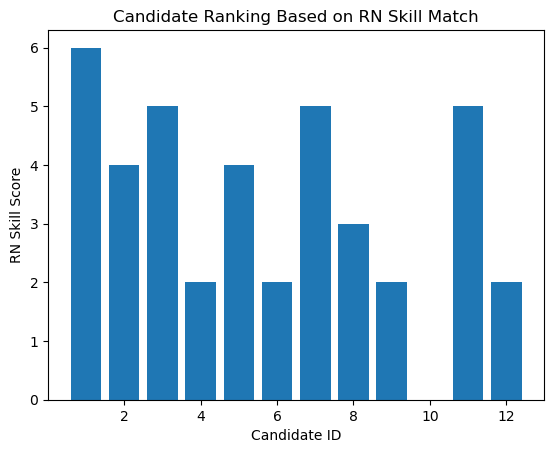

In [22]:
import matplotlib.pyplot as plt

candidate_ids = [c["candidate_id"] for c in ranked_candidates]
scores = [c["score"] for c in ranked_candidates]

plt.figure()
plt.bar(candidate_ids, scores)
plt.xlabel("Candidate ID")
plt.ylabel("RN Skill Score")
plt.title("Candidate Ranking Based on RN Skill Match")
plt.show()
